In [1]:
from sklearn import datasets #모듈 안에 MNIST Dataset을 제공
from sklearn.tree import DecisionTreeClassifier #의사결정 트리에 관련된 모듈을 import
from sklearn.ensemble import RandomForestClassifier #앙상블 랜덤포레스트 알고리즘 모듈 import
from sklearn.model_selection import cross_val_score #교차검증을 구현해서 제공해주는 대표 기능임. 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(5)

# 손글씨 데이터 로드
* MNIST Dataset: 60,000개의 학습데이터 셋 / 10,000개의 테스트 셋으로 이루어져 있음     
                 숫자는 0에서 1까지의 값을 갖는 고정 크기 이미지 (28x28 픽셀)로 크기 표준화되고 중심에 배치     
                 우체국에서 우편 번호를 사람이 분류하고 있었는데 기계가 자동으로 분류할 수 있도록      
                 학생과 우체국직원 대상으로 손글씨를 이미지화 하여 만든 데이터 셋    

In [3]:
mnist = datasets.load_digits() #사람이 쓴 0-9까지의 이미지 데이터를 반환해줌
features, labels = mnist.data, mnist.target #이미지화된 데이터셋에 실질적인 값이 data에 담김 / 이미지의 정답 값이 target필드에 저장되어져 있음.

# 교차 검증
* 교차 검증을 10번 수행하여, 10번의 교차 검증 평균 정확도를 저장.

In [4]:
#n개의 데이터가 있을때 7:3 혹은 8:2의 비율로 학습용(8:2나 7:3으로 나눔)과 테스트용의 데이터를 나누어서 
#모델에 나누어진 데이터를 집어넣어서 최종적인 성능을 평가하게 됨 
#=> 학습의 과정에서 얼마만큼의 정확도를 이 모델이 가져가고 있는지를 검증하면서 학습이 이루어져야 제대로 학습이 되어지는지 판단할 수 있음
#    따라서 80%의 데이터도 8:2나 7:3으로 나눠서 학습데이터와 검증데이터로 사용을 해야하는 것임.

#데이터의 양이 적을 때 훈련데이터를 비율로 나누게 된다면 한쪽으로 치우쳐질 가능성이 높음 
#(아무리 랜덤하게 데이터를 뽑아낸다고 하더라도 골고루 샘플링 데이터를 꺼내오지 못할 경우가 발생할 수 있음.)

#검증에서 주로 많이 활용하는 검증법이 k-fold 교차 검증 
# => 80%에 해당하는 데이터를 k등분해서 나눈 k등분에 따라서 등분마다 
#테스트용(1:k), 훈련용(n:k)으로 데이터를 k번 반복해서 정확도를 계산하여 
#각각의 정확도를 평균을 낸 값으로 정확도를 측정하도록 한다.

def cross_validation(classifier, features, labels): #(알고리즘, 훈련데이터, 정답데이터)
    cv_scores = [] #k-fold만큼 수행한 정확도값을 보관하기 위한 리스트 변수
    
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy') 
        #cross value로 해서 cv는 몇번의 교차검증을 수행할 것인지의 갯수를 넣어주면 됨 -> 10
        #scoring으로 설정한 값 -> 정확도 값이 반환될 것이다. 
        
        cv_scores.append(scores.mean()) #각각의 정확도를 평균을 하여 변수에 추가하도록 함.
        
    return cv_scores # 10개의 값이 리턴될 것임

In [5]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), features, labels) #의사결정트리 단독으로 k-fold를 적용한 정확도 값을 확인
#여기서는 어떠한 파라메타값이든 튜닝해주고 있지 않음 (의사결정트리는 파라메타의 튜닝이 큰 영향을 미침)
#즉, 과대적합에 빠질 가능성이 높은 모델이 되는 것임

In [6]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels) 
#대표적인 앙상블 알고리즘의 랜덤포레스트클래스파이어의 알고리즘을 적용하여 정확도를 교차 검증을 실행
#랜덤포레스트는 여러 개의 의사결정 트리를 구성해서 적용이 되어지는 개념의 모델이기 때문에 실행을 하면 시간이 오래걸림.

# 랜덤포레스트 vs 의사 결정 트리 시각화
* 라인 차트를 통해 랜덤포레스트가 의사결정트리보다 정확도가 어떻게 되는지 살펴보자.

In [7]:
cv_list = [['random_forest', rf_cv_scores],
           ['dicision_tree', dt_cv_scores]] #교차검증 결과값을 리스트에 담도록 함

df = pd.DataFrame.from_dict(dict(cv_list))

<Axes: >

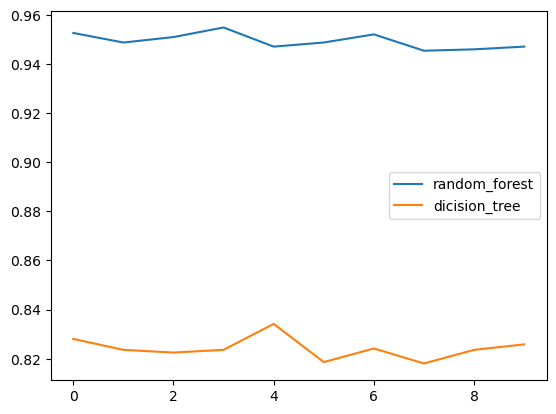

In [8]:
df.plot() # random_forest의 정확도가 더 높음
#하나의 모델을 가지고 학습되어진 데이터를 가지고 체크한 것보다 교차 검증에 의해 여러 개의 의사결정 트리를 구성하여 
# 적용을 하고 있는 앙상블의 알고리즘이 월등히 정확도가 높다.

# 의사결정트리 정확도

In [9]:
np.mean(dt_cv_scores)

0.8241843575418993

# 랜덤포레스트 정확도

In [10]:
np.mean(rf_cv_scores)

0.9494096834264433

In [ ]:
#[2차 프로젝트]
#실무에서 제공하는 실데이터 -> 경진대회로 적용하면 좋음. 

#앙상블(Ensemble)_여러 악기들이 조화롭게 서로 음악을 연주하는 것을 표현하는 단어임
#기존 알고리즘을 섞도록 한 알고리즘이다.
#좋은 장점으로 필요한 부분들을 활용할 수 있기 때문에 결과적으로 좋게 뽑아낼 수 있음

#여러 개의 분류 모델(knn, 서포트 벡터머신, 의사결정 트리, 나이브 베이즈)을 조합해서 더 좋은 성능을 내는 방법
#새로운 알고리즘이 아닌 기존 분류 알고리즘들의 성능개선에 따른 조합임!!

#앙상블에서 배깅, 부스터라는 단어가 언급됨 
#배깅(bagging): 부트스트랩 + 어그리게이팅 용어의 합성어

#배깅은 과대적합(너무 훈련에 최적화됨)에 최적화됨. 
#과대적합이 클수록 높은 성능으로 나옴.
#각각의 성능에서 테스트는 동일한 데이터에 같이 넣음. 
#다른 예측값이 나오고 그 다음 투표를 활용
#-> 의사결정 트리를 배깅하게 되었을 때 워낙 성능이 개선되다 보니 
#   랜덤 포레스트라는 알고리즘을 제공 (앙상블 대표 알고리즘)

#[배깅에 따른 용어 파악]
#-> 부트스트랩: 꼭 서로 다른 모델일 필요 없이 하나의 분류 모델로 학습을 시키는데 
#               학습을 시킬 때 분류 모델을 똑같은 알고리즘으로 여러 개 만듦
#같은 의사결정알고리즘을 여러 개 만들어서 입력의 데이터를 편향적으로 재배치하여 각각 알고리즘을 부르게 되는데
#이때, 분류기 갯수만큼 정확도를 계산하게 될 것이다. 그 분류기 갯수만큼 도출되어진 결과값을 하드 보팅과 소프트 보팅을 통해 가려낼 수 있도록 함

#학습 데이터를 조금 편향되도록 샘플링.
#6개의 모델을 만들고 입력데이터를 넣어주는데 
#데이터가 9개인데 입력데이터를 6개씩으로 셋팅
#약간의 가중치가 생기는 개념으로써 편향시켜서 학습을 나눠주는 것임.
#나중에 결과가 서로 다르게 도출되게 하기 위함이다.

#과대적합 모델의 특징이 학습 데이터의 분산은 높고 편향이 작다.
#편향은 금방 동조한다는 것이다. -> 개념은 회귀이론에서 더 정확하게 이해할 수 있음.

#  동일 알고리즘을 여러 개 만듦 
#  - 훈련 데이터를 일부로 나눠서 집어넣으면 입력의 데이터가 서로 다를 것임. 
#    그것을 통해서 성능이 나오고 그 성능을 평균을 내서 성능의 점수가 보정이 되게끔 한다.

#-> 어그리게이팅
#여러 분류 모델이 예측한 값들을 조합해서 하나의 결론을 도출하는 과정

#의사결정 트리 (스무고개 질문)
#특징이 여러 개가 있는데 중요한 영향을 미치는 특징이 무엇인지는 엔트로피로 계산했음 
# -> 정보이득이라는 개인값을 구하게 되면 큰 순서대로 핏쳐의 가중치를 판단을 할 수 있었음
# 엔트로피는 많은 연산이 필요하다 보니 지니계수의 알고리즘을 이용해서 엔트로피와 유사한 의미를 가지는 
# 알고리즘을 제안하여 좀 더 빠르게 처리가 되어질 수 있었음


#하드 보팅은 각 갯수로 의사결정트리가 분류한 최종 결과에 다수의견의 개념으로 판단하는 알고리즘이다. 
# (가장 높은 확률값을 가지는 것을 선택)

#소프트 보팅은 각 결과를 계산할 때 확률값을 계산해서 그 결과를 최종적으로 레포팅
#각 판단한 근거의 확률값을 가지고 최종 확률의 합에서 가장 큰 값을 결과로 선택